In [1]:
import pandas as pd
url = '/content/sample_data/mnist_train_small.csv'
url_test = '/content/sample_data/mnist_test.csv'

df = pd.read_csv(url, header=None, nrows=2500)
test_df = pd.read_csv(url_test, header=None, nrows=250)

df.head()
test_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784
0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [2]:
df.shape

(2500, 785)

In [3]:
y = df.iloc[:, 0]
X = df.iloc[:, 1:]

y_test = test_df.iloc[:, 0]
X_test = test_df.iloc[:, 1:]

In [4]:
X.shape

(2500, 784)

(784,)


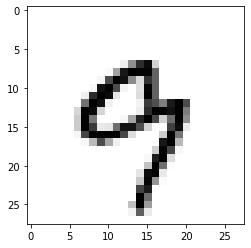

In [5]:
import numpy as np
import matplotlib.pyplot as plt

random_index = np.random.randint(0, X.shape[0])
random_row = X.iloc[random_index, :]

np_random_row = np.array(random_row)


print(np_random_row.shape)

random_im = np_random_row.reshape(28,28)

plt.imshow(random_im, cmap='Greys')
plt.show()

In [6]:
# 1-hot
from keras.utils.np_utils import to_categorical
y = to_categorical(y, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

X = X/255
X_test = X_test/255

In [7]:
X.shape

(2500, 784)

Need X shape (2000, 28, 28, 1)

In [8]:
#conv x to np array
X = np.array(X)
X_test = np.array(X_test)

#reshape X to (rows)
X = X.reshape(X.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [9]:
print(X.shape)
X_test.shape

(2500, 28, 28, 1)


(250, 28, 28, 1)

## CNN Model


In [23]:
#keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPool2D, AveragePooling2D, Dropout, BatchNormalization

model = Sequential()

#Conv layer
model.add(Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(28, 28, 1)))

#Max Pooling layer
model.add(MaxPool2D(2))

model.add(Conv2D(16, kernel_size=3, activation='relu', dilation_rate=2))

model.add(MaxPool2D(2))

#Flatten layer
model.add(Flatten())

model.add(BatchNormalization())

#Add Hidden Layer
model.add(Dense(64))

#Dropout
model.add(Dropout(.2))

#Output Layer
model.add(Dense(10, activation='softmax'))

print(model.summary())

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(X, y, epochs=20)
model.evaluate(X_test, y_test)

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_26 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 10, 10, 16)        4624      
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 400)               0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 400)               1600      
_________________________________________________________________
dense_14 (Dense)             (None, 64)              

[0.03948855772614479, 0.984000027179718]